In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# IMDB RATINGS

imdb_ratings = pd.read_csv('imdb.title.ratings.csv')
imdb_ratings.head(2)

# IMDB DATA WITH MOVIE TITLE AND GENRES

imdb_title = pd.read_csv('imdb.title.basics.csv.gz')
# Dropping original_title and keeping the primary title as the main title

imdb_title.drop(['original_title', 'start_year',
                 'start_year'], axis=1, inplace=True)
imdb_title.head(2)

joined_imdb = imdb_ratings.set_index('tconst').join(
    imdb_title.set_index('tconst'), on='tconst', how='inner')


# Dropped missing values in the genres column
joined_imdb.dropna(subset=['genres'], axis=0, inplace=True)


# Filling runtime_minutes column missing values with the columns mean value
joined_imdb['runtime_minutes'].fillna(
    value=joined_imdb['runtime_minutes'].mean(), inplace=True)
joined_imdb.head(1)

In [17]:
# DROPPED RUNTIME OUTLIERS and KEPT MOVIES 200 MINUTES AND UNDER

movie_rating = joined_imdb.loc[joined_imdb['runtime_minutes'] < 200]
movie_rating.runtime_minutes.describe()

count    72890.000000
mean        93.392908
std         20.864767
min          3.000000
25%         83.000000
50%         93.000000
75%        101.000000
max        199.000000
Name: runtime_minutes, dtype: float64

Text(0.5, 0, 'Rating')

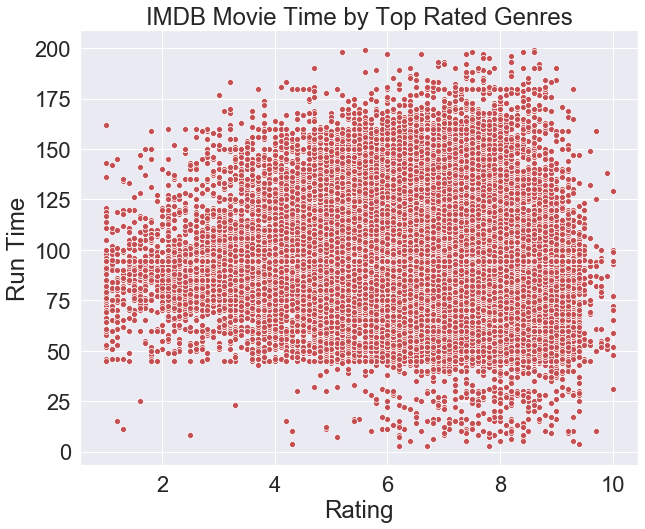

In [18]:
x = movie_rating.averagerating
y = movie_rating.runtime_minutes
plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, color='r')
plt.title('IMDB Movie Time by Top Rated Genres')
plt.ylabel('Run Time')
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=2)
plt.xlabel('Rating')

In [19]:
top_rated = joined_imdb.loc[joined_imdb['averagerating'] > 7]
top_rated.genres.value_counts().head(10)

Documentary                      6444
Drama                            3640
Comedy                           1108
Comedy,Drama                      728
Documentary,Music                 414
Biography,Documentary             411
Drama,Romance                     385
Documentary,Drama                 374
Biography,Documentary,History     335
Documentary,History               320
Name: genres, dtype: int64

Text(0.5, 0, 'Genres')

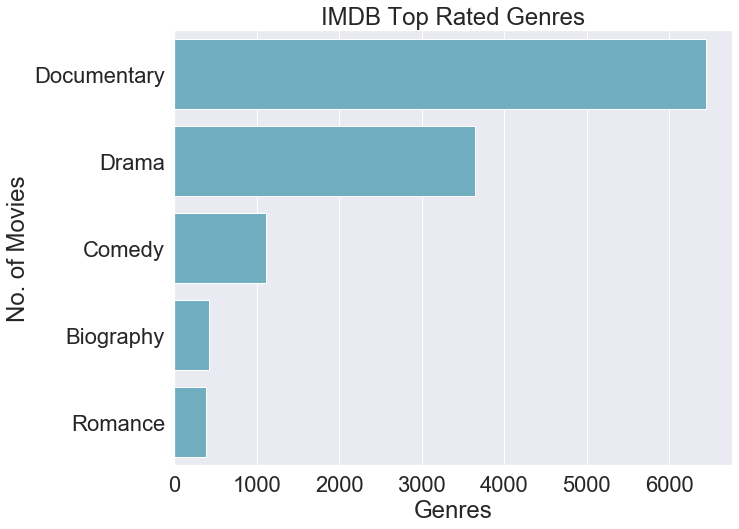

In [127]:
y = ['Documentary', 'Drama', 'Comedy', 'Biography', 'Romance']

x = [6444, 3640, 1108, 414, 385]

plt.figure(figsize=(10, 8))

sns.barplot(x, y, color='c')
plt.title('IMDB Top Rated Genres')
plt.ylabel('No. of Movies')
sns.set(context='notebook',
        style='darkgrid',
        font='sans-serif',
        font_scale=2)
plt.xlabel('Genres')

In [187]:
rotten_ratings = pd.read_csv(
    'rt.reviews.tsv', sep='\t', encoding='unicode_escape')


# Dropping THE CRITIC NAME and NaN values for the Rating COLUMN
rotten_ratings.drop(['critic', 'review', 'publisher'], axis=1, inplace=True)
rotten_ratings.dropna(subset=['rating'], axis=0, inplace=True)

rotten_ratings.head(2)

rotten_movies = pd.read_csv('rt.movie_info.tsv', sep='\t')


# Dropping Columns not Necessary for Data Analysis and Nan Values.

rotten_movies.drop(['synopsis', 'dvd_date', 'writer', 'theater_date', 'currency',
                    'box_office', 'director', 'studio', 'rating'],  axis=1, inplace=True)
rotten_movies.dropna(inplace=True)
rotten_movies.head(2)

,id,genre,runtime
0,1,Action and Adventure|Classics|Drama,104 minutes
1,3,Drama|Science Fiction and Fantasy,108 minutes


In [188]:
# Joining the Two Rotten Tomatoes Data Sets

joined_rotten = rotten_movies.join(
    rotten_ratings, on='id', how='inner', lsuffix='id')
joined_rotten.drop('id', axis=1, inplace=True)

joined_rotten.head(2)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,C,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,2/5,rotten,0,"April 21, 2013"


In [189]:
# Defining Funcitons that replace non integer values to integer values
def change_rating(df):
    for strings in df:
        df.replace('A', 5, regex=True, inplace=True)

In [190]:
change_rating(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,C,rotten,0,"July 17, 2013"


In [191]:
def change_rating1(df):
    for strings in df:
        df.replace('B', 3, regex=True, inplace=True)

In [192]:
change_rating1(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,C,rotten,0,"July 17, 2013"


In [194]:
def change_rating2(df):
    for strings in df:
        df.replace('C', 2, regex=True, inplace=True)

In [196]:
change_rating2(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [197]:
def change_rating3(df):
    for strings in df:
        df.replace('D', 1, regex=True, inplace=True)

In [198]:
change_rating3(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,2/5,rotten,0,"April 21, 2013"


In [199]:
def change_rating4(df):
    for strings in df:
        df.replace('F', 0, regex=True, inplace=True)

In [200]:
change_rating4(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,2/5,rotten,0,"April 21, 2013"


In [201]:
def change_rating5(df):
    for strings in df:
        df.replace('1/5', 1, regex=True, inplace=True)

In [202]:
change_rating5(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [203]:
def change_rating6(df):
    for strings in df:
        df.replace('2/5', 2, regex=True, inplace=True)

In [204]:
change_rating6(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [205]:
def change_rating7(df):
    for strings in df:
        df.replace('3/5', 3, regex=True, inplace=True)

In [206]:
change_rating7(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [207]:
def change_rating10(df):
    for strings in df:
        df.replace('3/4', 3, regex=True, inplace=True)

In [208]:
change_rating10(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [209]:
def change_rating8(df):
    for strings in df:
        df.replace('4/5', 4, regex=True, inplace=True)

In [210]:
change_rating8(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [211]:
def change_rating8(df):
    for strings in df:
        df.replace('5/5', 5, regex=True, inplace=True)

In [212]:
change_rating8(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [213]:
def change_rating11(df):
    for strings in df:
        df.replace('4/4', 5, regex=True, inplace=True)

In [214]:
def change_rating13(df):
    for strings in df:
        df.replace('2.5/4', 2.5, regex=True, inplace=True)

In [215]:
def change_rating14(df):
    for strings in df:
        df.replace('2.0/5', 2, regex=True, inplace=True)

In [216]:
change_rating14(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [217]:
def change_rating16(df):
    for strings in df:
        df.replace('1/4', 1, regex=True, inplace=True)

In [218]:
change_rating16(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [219]:
def change_rating15(df):
    for strings in df:
        df.replace('3.5/4', 4, regex=True, inplace=True)

In [220]:
change_rating15(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [221]:
change_rating13(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [222]:
def change_rating17(df):
    for strings in df:
        df.replace('2/4', 2, regex=True, inplace=True)

In [223]:
change_rating17(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [224]:
def change_rating18(df):
    for strings in df:
        df.replace('1.5/4', 1, regex=True, inplace=True)

In [225]:
change_rating18(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [226]:
def change_rating19(df):
    for strings in df:
        df.replace('8/10', 4, regex=True, inplace=True)

In [227]:
change_rating19(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [228]:
def change_rating20(df):
    for strings in df:
        df.replace('9/10', 4.5, regex=True, inplace=True)

In [229]:
change_rating20(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [230]:
def change_rating21(df):
    for strings in df:
        df.replace('6/10', 3, regex=True, inplace=True)

In [231]:
change_rating21(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [232]:
def change_rating22(df):
    for strings in df:
        df.replace('7/10', 3.5, regex=True, inplace=True)

In [233]:
change_rating22(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [234]:
def change_rating23(df):
    for strings in df:
        df.replace('4/10', 2, regex=True, inplace=True)

In [235]:
change_rating23(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [236]:
def change_rating24(df):
    for strings in df:
        df.replace('5/10', 2.5, regex=True, inplace=True)

In [237]:
change_rating24(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [238]:
def change_rating25(df):
    for strings in df:
        df.replace('3/10', 1.5, regex=True, inplace=True)

In [239]:
change_rating25(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [240]:
def change_rating26(df):
    for strings in df:
        df.replace('0/5', 0, regex=True, inplace=True)

In [241]:
change_rating26(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [242]:
def change_rating27(df):
    for strings in df:
        df.replace('0.5/5', 0, regex=True, inplace=True)

In [243]:
change_rating27(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [244]:
def change_rating28(df):
    for strings in df:
        df.replace('0.5/4', 0, regex=True, inplace=True)

In [245]:
change_rating28(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [246]:
def change_rating29(df):
    for strings in df:
        df.replace('2/10', 1, regex=True, inplace=True)

In [247]:
change_rating29(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [248]:
def change_rating30(df):
    for strings in df:
        df.replace('1/10', 0.5, regex=True, inplace=True)

In [249]:
change_rating30(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [250]:
def change_rating31(df):
    for strings in df:
        df.replace('4.0/4', 4, regex=True, inplace=True)

In [251]:
change_rating31(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [252]:
def change_rating32(df):
    for strings in df:
        df.replace('2.5', 2.5, regex=True, inplace=True)

In [253]:
change_rating32(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [254]:
def change_rating33(df):
    for strings in df:
        df.replace('3.7/5', 3.7, regex=True, inplace=True)

In [255]:
change_rating33(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [256]:
def change_rating34(df):
    for strings in df:
        df.replace('0/4', 0, regex=True, inplace=True)

In [257]:
change_rating34(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [258]:
def change_rating35(df):
    for strings in df:
        df.replace('7.7', 3.3, regex=True, inplace=True)

In [259]:
change_rating35(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [260]:
def change_rating36(df):
    for strings in df:
        df.replace('D+', 1, regex=True, inplace=True)

In [261]:
change_rating36(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [262]:
change_rating19(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [263]:
change_rating11(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,2,rotten,0,"April 21, 2013"


In [264]:
def change_rating40(df):
    for strings in df:
        df.replace(6, 3, regex = True, inplace=True)

In [265]:
change_rating40(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [266]:
def change_rating41(df):
    for strings in df:
        df.replace(7, 3.5, regex=True, inplace=True)

In [267]:
change_rating41(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [268]:
def change_rating42(df):
    for strings in df:
        df.replace(8, 4, regex=True, inplace=True)

In [269]:
change_rating42(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [270]:
def change_rating43(df):
    for strings in df:
        df.replace(9, 4.5, regex=True, inplace=True)

In [271]:
change_rating43(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [272]:
def change_rating44(df):
    for strings in df:
        df.replace(10, 5, regex=True, inplace=True)

In [273]:
change_rating43(joined_rotten.rating)
joined_rotten.head(1)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"


In [274]:
joined_rotten['rating'] = joined_rotten.rating.astype(int)
change_rating3(joined_rotten.rating)
joined_rotten.head(2)

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128 minutes,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200 minutes,2,rotten,0,"April 21, 2013"


In [275]:
def remove_format(df):
    for strings in df:
        df.replace('minutes', '', regex=True, inplace=True)

In [276]:
remove_format(joined_rotten.runtime)

In [277]:
# Changing runtime to intg
joined_rotten['runtime'] = joined_rotten.runtime.astype(int)
joined_rotten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 3 to 1559
Data columns (total 7 columns):
idid          1135 non-null int64
genre         1135 non-null object
runtime       1135 non-null int64
rating        1135 non-null int64
fresh         1135 non-null object
top_critic    1135 non-null int64
date          1135 non-null object
dtypes: int64(4), object(3)
memory usage: 70.9+ KB


In [283]:
joined_rotten.head()

,idid,genre,runtime,rating,fresh,top_critic,date
3,6,Drama|Mystery and Suspense,128,2,rotten,0,"July 17, 2013"
4,7,Drama|Romance,200,2,rotten,0,"April 21, 2013"
7,13,Drama,123,3,fresh,0,"January 7, 2013"
8,14,Drama,117,3,fresh,0,"October 20, 2012"
9,15,Action and Adventure|Mystery and Suspense|Scie...,108,3,fresh,0,"September 27, 2012"


Text(0.5, 0, 'Critic Rating')

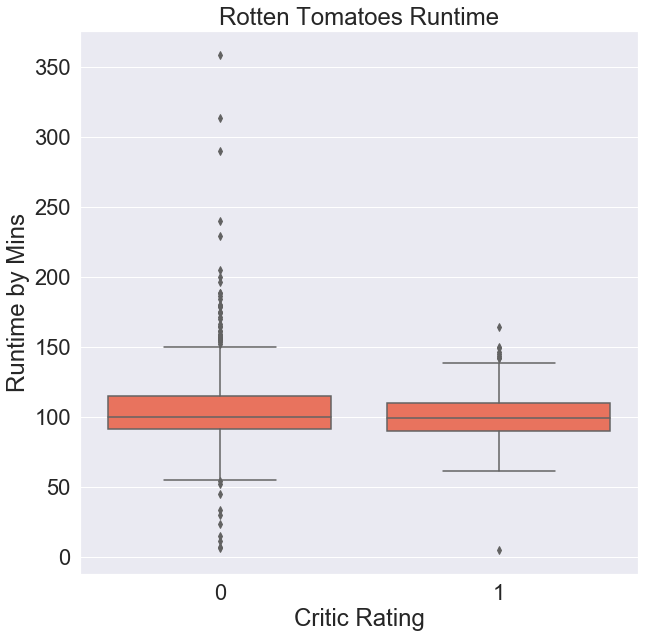

In [289]:
x = joined_rotten.top_critic
y = joined_rotten.runtime

plt.figure(figsize=(10, 10))
sns.boxplot(x, y, color='tomato')
plt.title('Rotten Tomatoes Runtime')
plt.ylabel('Runtime by Mins')
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=2)
plt.xlabel('Critic Rating')

Text(0.5, 0, 'Rating')

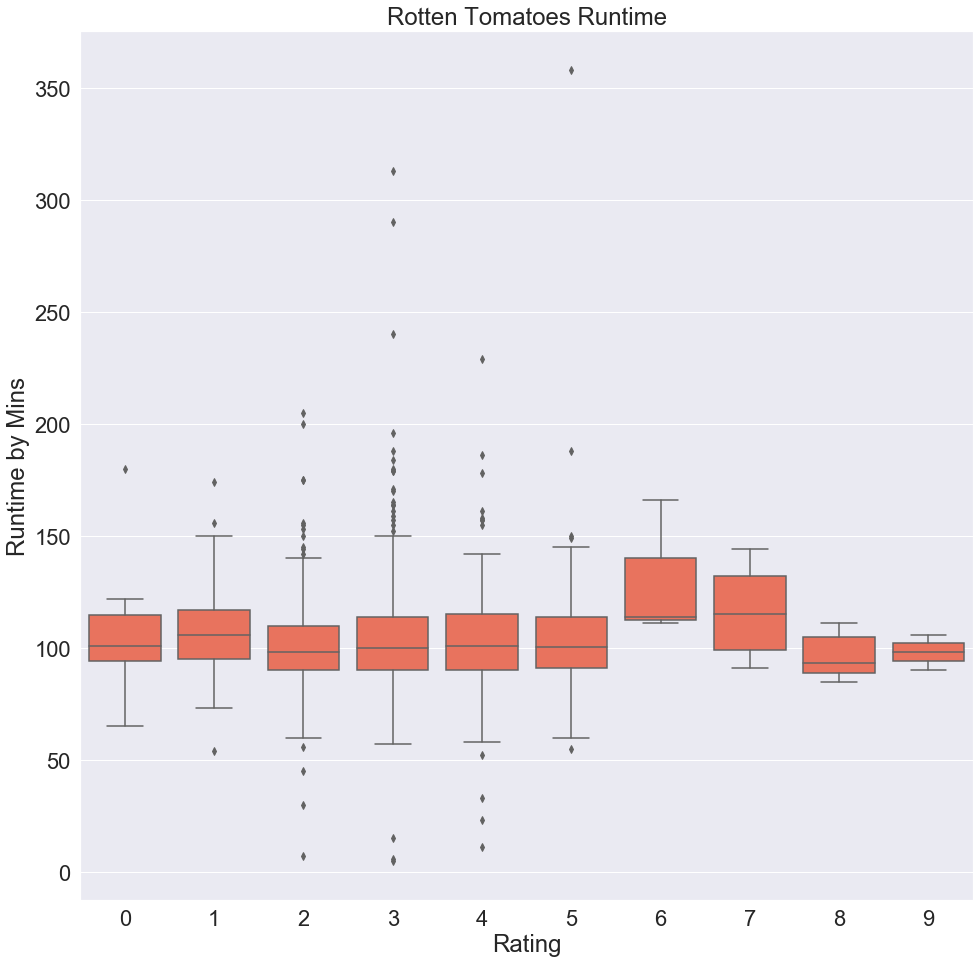

In [282]:
x = joined_rotten.rating
y = joined_rotten.runtime

plt.figure(figsize=(16, 16))
sns.boxplot(x, y, color='tomato')
plt.title('Rotten Tomatoes Runtime')
plt.ylabel('Runtime by Mins')
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=2)
plt.xlabel('Rating')

In [279]:
top_rated_rotten = joined_rotten.loc[joined_rotten['rating'] > 3]
top_rated_rotten.genre.value_counts().head(10)

Drama                                               46
Comedy                                              31
Comedy|Drama                                        27
Drama|Mystery and Suspense                          18
Action and Adventure|Drama|Mystery and Suspense     17
Art House and International|Drama                   17
Art House and International|Comedy|Drama            11
Action and Adventure|Drama                          11
Classics|Drama|Mystery and Suspense                 10
Action and Adventure|Science Fiction and Fantasy     9
Name: genre, dtype: int64

Text(0.5, 0, 'No. of Movies')

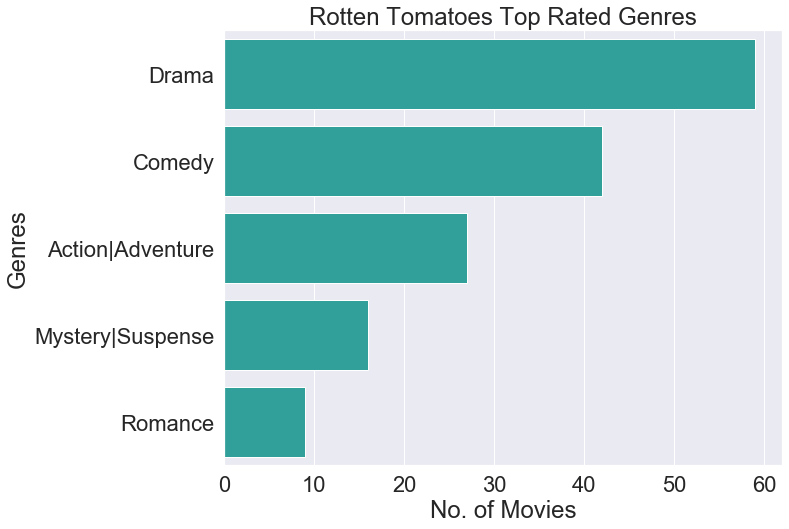

In [280]:
y = ['Drama', 'Comedy', 'Action|Adventure', 'Mystery|Suspense', 'Romance']

x = [59, 42, 27, 16, 9]

plt.figure(figsize=(10, 8))
sns.barplot(x, y, color='lightseagreen')
plt.title('Rotten Tomatoes Top Rated Genres')
plt.ylabel('Genres')
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=2)
plt.xlabel('No. of Movies')

In [281]:
top_rated_rotten.head(2)

,idid,genre,runtime,rating,fresh,top_critic,date
12,19,Documentary|Special Interest,90,5,fresh,0,"September 10, 2012"
15,22,Comedy|Drama|Mystery and Suspense,108,8,fresh,0,"September 7, 2012"
